# Project 3: Web APIs & NLP

---

#### 02: <b>Data Cleaning, EDA, Preprocessing</b>

### Contents:
- [Imports and functions](#Library-and-data-import)
- [Initial Analysis](#Initial-analysis)
- [Data Cleaning](#Data-cleaning)
- [Exploratory Visualizations](#Exploratory-visualizations)
- [Combine dataframes & feature engineer](#Combine-dataframes-&-feature-engineer)
- [Export](#Export)

## Import Library

In [1]:
import pandas as pd
import numpy as np
import regex as re
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns


from sklearn.feature_extraction.text import CountVectorizer

pd.set_option("display.max_columns", 90)
pd.set_option("display.max_rows", 200)

## Initial analysis
---

We will be conducting a preliminary analisys by looking through our raw dataframes for missing values, number of columns and rows.

### Functions used

In [2]:
# heatmap to visualise null values in dataframe
def plot_heatmap(df):
    plt.figure(figsize = (20,10))
    sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
    plt.show()

### Coffee 
---

In [3]:
# import csv
coffee_df = pd.read_csv('../datasets/coffee.csv')

In [4]:
coffee_df.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,author_premium,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_created_from_ads_ui,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_richtext,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,pwls,retrieved_on,score,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,title,total_awards_received,treatment_tags,upvote_ratio,url,whitelist_status,wls,post_hint,preview,removed_by_category,thumbnail_height,thumbnail_width,url_overridden_by_dest,author_flair_template_id,author_flair_text_color,media,media_embed,secure_media,secure_media_embed,author_flair_background_color,suggested_sort,distinguished,gallery_data,is_gallery,media_metadata,author_cakeday
0,[],False,Oddish_Flumph,NaN,[],NaN,text,t2_7so9zfi,False,False,True,[],False,False,1642034770,self.Coffee,https://www.reddit.com/r/Coffee/comments/s2lvp...,{},s2lvpk,False,True,False,False,False,True,True,False,NaN,[],dark,text,False,False,True,0,0,False,all_ads,/r/Coffee/comments/s2lvpk/new_coffee_enjoyer_l...,False,6,1642034780,1,Ive been enjoying coffee more in general and b...,True,False,False,Coffee,t5_2qhze,860476,public,self,new coffee enjoyer looking for suggestions one...,0,[],1.0,https://www.reddit.com/r/Coffee/comments/s2lvp...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,PsychosisCustoms,NaN,[],NaN,text,t2_fuk9bnko,False,False,False,[],False,False,1642032948,self.Coffee,https://www.reddit.com/r/Coffee/comments/s2la4...,{},s2la4s,False,True,False,False,False,True,True,False,NaN,[],dark,text,False,False,True,0,0,False,all_ads,/r/Coffee/comments/s2la4s/99_100_people_do_not...,False,6,1642032959,1,[https://youtu.be/UQV0J-IgcyE](https://youtu.b...,True,False,False,Coffee,t5_2qhze,860447,public,self,99% - 100% people Do Not Know... Tell Your Bud...,0,[],1.0,https://www.reddit.com/r/Coffee/comments/s2la4...,all_ads,6,self,"{'enabled': False, 'images': [{'id': 'qdLqeep0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,KlutzyNail435,NaN,[],NaN,text,t2_6bua15wh,False,False,False,[],False,False,1642031561,self.Coffee,https://www.reddit.com/r/Coffee/comments/s2krk...,{},s2krkh,False,True,False,False,False,True,True,False,NaN,[],dark,text,False,False,True,0,0,False,all_ads,/r/Coffee/comments/s2krkh/my_coffee_tastes_lik...,False,6,1642031571,1,"Ok so this may sound dumb, but whenever I make...",True,False,False,Coffee,t5_2qhze,860427,public,self,My coffee tastes like tomato?? 🍅☕️,0,[],1.0,https://www.reddit.com/r/Coffee/comments/s2krk...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,KlutzyNail435,NaN,[],NaN,text,t2_6bua15wh,False,False,False,[],False,False,1642031280,self.Coffee,https://www.reddit.com/r/Coffee/comments/s2knm...,{},s2knmx,False,True,False,False,False,True,True,False,NaN,[],dark,text,False,False,True,0,0,False,all_ads,/r/Coffee/comments/s2knmx/my_coffee_tastes_sour/,False,6,1642031290,1,I was gifted an espresso machine for Christmas...,True,False,False,Coffee,t5_2qhze,860426,public,self,My coffee tastes sour. ☕️,0,[],1.0,https://www.reddit.com/r/Coffee/comments/s2knm...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,Lovewinsbruh,NaN,[],NaN,text,t2_i181cjym,False,False,False,[],False,False,1642029981,self.Coffee,https://www.reddit.com/r/Coffee/comments/s2k6h...,{},s2k6hw,False,True,False,False,False,True,True,False,NaN,[],dark,text,False,False,True,0,0,False,all_ads,/r/Coffee/comments/s2k6hw/i_had_my_first_ever_...,False,6,1642029992,1,NaN,True,

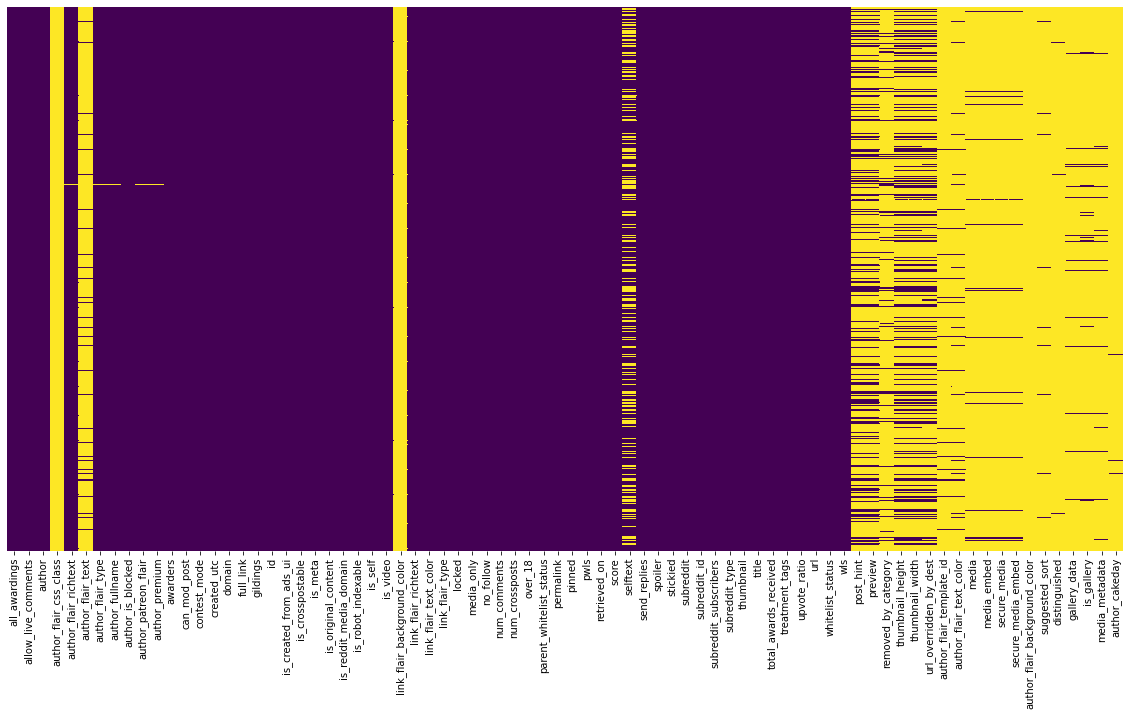

In [5]:
# visualise frequency of NaN values in dataset
plot_heatmap(coffee_df)

In [6]:
coffee_df.isnull().sum()[coffee_df.isnull().sum()>0]

author_flair_css_class           1500
author_flair_richtext               2
author_flair_text                1419
author_flair_type                   2
author_fullname                     2
author_patreon_flair                2
author_premium                      2
link_flair_background_color      1500
selftext                          469
post_hint                        1110
preview                          1110
removed_by_category              1375
thumbnail_height                 1106
thumbnail_width                  1106
url_overridden_by_dest           1106
author_flair_template_id         1457
author_flair_text_color          1417
media                            1462
media_embed                      1462
secure_media                     1462
secure_media_embed               1462
author_flair_background_color    1500
suggested_sort                   1479
distinguished                    1491
gallery_data                     1463
is_gallery                       1447
media_metada

In [7]:
coffee_df.shape

(1500, 78)

### Tea
---

In [8]:
# import csv
tea_df = pd.read_csv('../datasets/tea.csv')

In [9]:
tea_df.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,author_premium,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_created_from_ads_ui,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_css_class,link_flair_richtext,link_flair_template_id,link_flair_text,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,post_hint,preview,pwls,retrieved_on,score,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,thumbnail_height,thumbnail_width,title,total_awards_received,treatment_tags,upvote_ratio,url,url_overridden_by_dest,whitelist_status,wls,removed_by_category,gallery_data,is_gallery,media_metadata,author_cakeday,media,media_embed,secure_media,secure_media_embed,author_flair_background_color,author_flair_text_color,poll_data,author_flair_template_id,crosspost_parent,crosspost_parent_list
0,[],False,_pureguava,NaN,[],NaN,text,t2_aor7cgt8,False,False,False,[],False,False,1642036605,i.imgur.com,https://www.reddit.com/r/tea/comments/s2mijw/r...,{},s2mijw,False,True,False,False,False,True,False,False,NaN,reco,"[{'e': 'text', 't': 'Recommendation'}]",7863b26c-9f57-11e4-a2b0-22000bc1889b,Recommendation,dark,richtext,False,False,True,1,0,False,all_ads,/r/tea/comments/s2mijw/rooibos_is_one_of_my_fa...,False,image,"{'enabled': True, 'images': [{'id': '-VdnpfNai...",6,1642036616,1,NaN,True,False,False,tea,t5_2qq5e,562520,public,https://b.thumbs.redditmedia.com/-vlldqIrr2COu...,140.0,140.0,Rooibos is one of my favorites right now,0,[],1.0,https://i.imgur.com/DE4cist.jpg,https://i.imgur.com/DE4cist.jpg,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,DS9B5SG-1,NaN,[],NaN,text,t2_aitvrdc4,False,False,False,[],False,False,1642034639,self.tea,https://www.reddit.com/r/tea/comments/s2lu50/i...,{},s2lu50,False,False,False,False,False,False,True,False,NaN,help,"[{'e': 'text', 't': 'Question/Help'}]",64c60b7e-9f57-11e4-adfe-22000b680aa5,Question/Help,dark,richtext,False,False,True,0,0,False,all_ads,/r/tea/comments/s2lu50/is_cold_tea_as_healthy_...,False,NaN,NaN,6,1642034649,1,[removed],True,False,False,tea,t5_2qq5e,562498,public,self,NaN,NaN,Is cold tea as healthy as hot tea?,0,[],1.0,https://www.reddit.com/r/tea/comments/s2lu50/i...,NaN,all_ads,6,automod_filtered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,ImprovementSenior992,NaN,[],NaN,text,t2_eyyrrakw,False,False,False,[],False,False,1642031749,makeityourown.com,https://www.reddit.com/r/tea/comments/s2ktzg/e...,{},s2ktzg,False,True,False,False,False,True,False,False,NaN,NaN,[],NaN,NaN,dark,text,False,False,True,0,0,False,all_ads,/r/tea/comments/s2ktzg/earl_grey_liqueur/,False,link,"{'enabled': False, 'images': [{'id': 'HzrpR3Eb...",6,1642031759,1,NaN,True,False,False,tea,t5_2qq5e,562465,public,https://a.thumbs.redditmedia.com/2svGMXWKYVg-a...,140.0,140.0,Earl Grey Liqueur,0,[],1.0,https://makeityourown.com/recipes/blueberry-ea...,https://makeityourown.com/recipes/blueberry-ea...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,DisastrousTarget5060,NaN,[],NaN,text,t2_8alp9lvv,False,False,False,[],False,False,1642026117,self.tea,https://www.reddit.com/r/tea/comments/s2ips5/i...,{},s2ips5,False,True,False,False,False,True,True,False,NaN,reco,"[{'e': 'text', 't': 'Recommendation'}]",7863b26c-9f57-11e4-a2b0-22000bc1889b,Recommendation,dark,richtext,False,False,True,0,0,False,all_ads,/r/tea/comments/s2ips5/i_want_to_try_tea_but_d...,False,NaN,NaN,6,1642026128,1,My brother in law LOVES tea and he always look...,True,False,False,tea,t5_2qq5e,562404,public,self,NaN,NaN,I want to try tea but don't know where to start,0,[],1.0,https://www

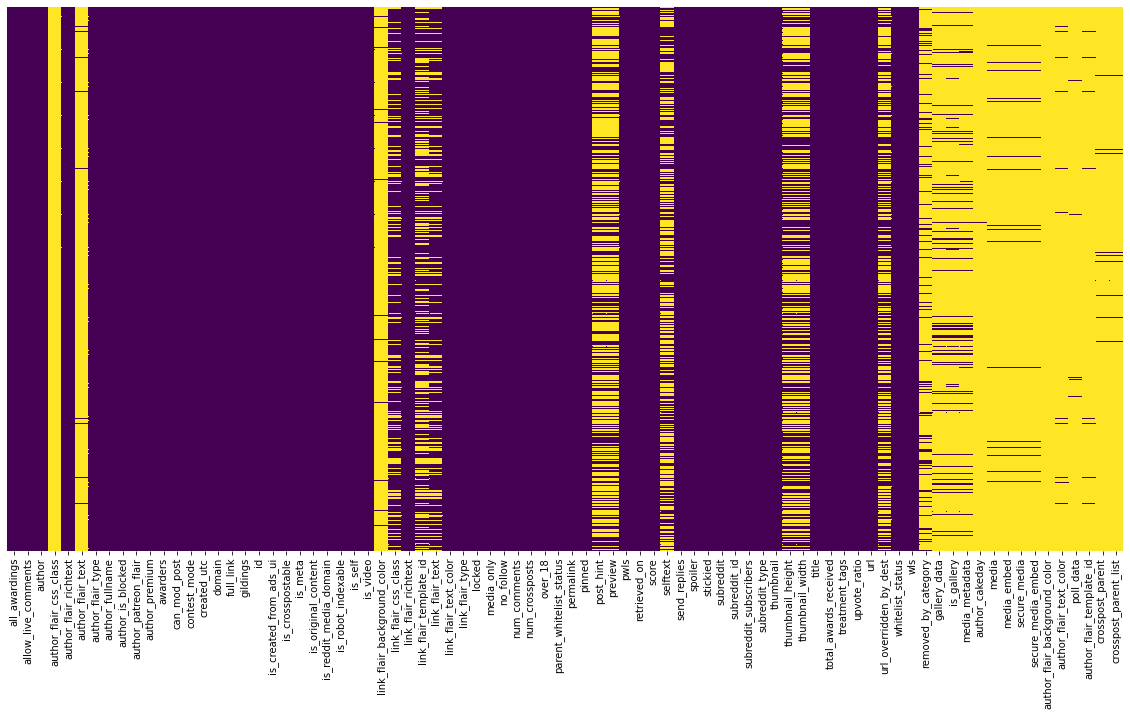

In [10]:
# visualise frequency of NaN values in dataset
plot_heatmap(tea_df)

In [11]:
tea_df.isnull().sum()[tea_df.isnull().sum()>0]

author_flair_css_class           1499
author_flair_richtext               2
author_flair_text                1469
author_flair_type                   2
author_fullname                     2
author_patreon_flair                2
author_premium                      2
link_flair_background_color      1462
link_flair_css_class              346
link_flair_template_id            600
link_flair_text                   346
post_hint                         902
preview                           902
selftext                          823
thumbnail_height                  719
thumbnail_width                   719
url_overridden_by_dest            714
removed_by_category              1250
gallery_data                     1316
is_gallery                       1289
media_metadata                   1302
author_cakeday                   1492
media                            1463
media_embed                      1463
secure_media                     1463
secure_media_embed               1463
author_flair

In [12]:
tea_df.shape

(1499, 82)

## Data cleaning
---
### Functions used

In [13]:
# function to clean up dataframe by stripping, sorting and dropping columns
def strip_sort_df(df):
    df_cleaned = df.copy(deep = True) # create an independent copy of existing dataframe
    df_cleaned.loc[:,'title_strip'] = df.loc[:,'title'].str.strip()
    df_cleaned.loc[:,'selftext_strip'] = df.loc[:,'selftext'].str.strip()
    df_cleaned.drop(['selftext','title'], axis =1, inplace = True)
    df_cleaned.sort_values(by=['author','selftext_strip'], inplace=True)
    return df_cleaned

### Coffee
---

Since our problem statement requires us to analyse text words in posts made by reddit users, we will only be choosing the `author`, `title` and `selftext` columns. As well as coffee and tea `subreddit` column as a dependent variable for our subsequent models.

In [14]:
# create dataframe with key columns to analyse
coffee_df2 = coffee_df[['subreddit','author','title','selftext']]

In [15]:
coffee_df2.head(150)

,subreddit,author,title,selftext
0,Coffee,Oddish_Flumph,new coffee enjoyer looking for suggestions one...,Ive been enjoying coffee more in general and b...
1,Coffee,PsychosisCustoms,99% - 100% people Do Not Know... Tell Your Bud...,[https://youtu.be/UQV0J-IgcyE](https://youtu.b...
2,Coffee,KlutzyNail435,My coffee tastes like tomato?? 🍅☕️,"Ok so this may sound dumb, but whenever I make..."
3,Coffee,KlutzyNail435,My coffee tastes sour. ☕️,I was gifted an espresso machine for Christmas...
4,Coffee,Lovewinsbruh,I had my first ever nitro from Starbucks an ho...,NaN
5,Coffee,Kaz3girl4,Roasting My Own Coffee,So I am new to roasting...So new that I've nev...
6,Coffee,-Gavs-,Scaling 4:6 v60 method. Do I Also Scale Pour T...,"If, for the 4:6 v60 method, I want to scale th..."
7,Coffee,mywaypantry,Veggie Sandwich,NaN
8,Coffee,Iceman2913,"It finally happened, I got covid and now every...","Tested positive for covid on New Year's day, b..."
9,Coffee,elowennmai,closest thing to cafetiere coffee,When I go to a coffee shop I always have a lat...


In [16]:
# remove 'moderator' & 'deleted' posts as we are only interested in actual users' posts
coffee_df2 = coffee_df2[(coffee_df2['author'] != 'menschmaschine5') & (coffee_df2['author'] != '[deleted]')]

In [17]:
# clean up dataframe by stripping, sorting and dropping columns
coffee_cleaned = strip_sort_df(coffee_df2)

In [18]:
# visualize all duplicated titles
coffee_cleaned[coffee_cleaned.duplicated(subset=['title_strip'], keep= False)]

,subreddit,author,title_strip,selftext_strip
97,Coffee,ACKD,Comandante static,"Hey everyone, I've been noticing a fair amount..."
782,Coffee,ACKD,Comandante static,Photo: https://imgur.com/a/QvVevgg\n\nHey ever...
280,Coffee,AlaskanCheeseManiac,The botton part of my Aluminum Bialetti is get...,I am unsure if these dried coffee spots which ...
278,Coffee,AlaskanCheeseManiac,The botton part of my Aluminum Bialetti is get...,NaN
72,Coffee,AutisticUnit2,"Anyone want at-cost earrings, magnets, or pins...",NaN
1051,Coffee,AutisticUnit2,"Anyone want at-cost earrings, magnets, or pins...",NaN
59,Coffee,Away-Introduction-24,Jura E6 cleaning,My 5 yr old De’Longhi is dying on me and looki...
60,Coffee,Away-Introduction-24,Jura E6 cleaning,NaN
1017,Coffee,Dookiecubes,Coffee,I don’t like coffee.
1335,Coffee,Fordged,You should have seen my mom's eyes when I aske...,NaN


In [19]:
# remove duplicated titles
coffee_cleaned.drop_duplicates(subset=['title_strip'], inplace = True)

In [20]:
coffee_cleaned.isnull().sum()

subreddit           0
author              0
title_strip         0
selftext_strip    458
dtype: int64

In [21]:
# fill NaN values with blanks
coffee_cleaned.fillna(value = {'selftext_strip': ''}, inplace = True)

In [22]:
# visualize all posts that were removed
coffee_cleaned[coffee_cleaned['selftext_strip'].str.contains(r'\[removed]$')]

,subreddit,author,title_strip,selftext_strip
697,Coffee,Aaronh123ny,Protein Powder Coffee ; I was thinking of open...,[removed]
225,Coffee,Acavia8,Wush Wush the new gesha?,[removed]
712,Coffee,Additional_Reserve27,Best coffee beans for black coffee?,[removed]
1024,Coffee,Dsg1695,What’s the ratio for making espresso?,[removed]
195,Coffee,FostersLab,"Coffee ground by the roaster for french press,...",[removed]
115,Coffee,HerbAdvanced89,TRUSTED BLESSED KRATOM Tbk,[removed]
354,Coffee,LINE693856,台北北投叫小姐賴：693856北投外送茶/北投出差叫小姐/北投找女人/北投約妹/住家找上門服...,[removed]
123,Coffee,Pianist_Empty,Follow for some ☕️https://onlyfans.com/coffetales,[removed]
1135,Coffee,REVENGE0104,MERRY CHRISTMAS AND HAPPY NEW YEAR 2022,[removed]
919,Coffee,ReformedJedi318,Chemex Brewing Help,[removed]


Observations on removed posts: 

Despite being posts that were removed, most of the post titles were still relevant to our topic on Coffee and we would ideally want to avoid removing words that may be essential to the learning of our models.

Hence, we would only remove non-english removed posts made by non-english native authors.

In [23]:
# remove non-english [removed] posts by filtering author
coffee_cleaned = coffee_cleaned[~coffee_cleaned['author'].isin(['LINE693856'])]

# replace the rest with selftext as blank space
coffee_cleaned = coffee_cleaned.replace(to_replace = r'\[removed]$', value = '', regex=True)

In [24]:
# sanity check
coffee_cleaned[coffee_cleaned['selftext_strip'].str.contains(r'\[removed]$')]

,subreddit,author,title_strip,selftext_strip


### Further analysis 

We would now see which users are having the highest number of subreddit postings. This might indicate that the user would be a spammer / promoting their shops or events, in which such posts would then not be a credible source. In addition, given the relatively high number of postinsgs, coffee preferences as a whole might be skewed towards the preferences of these few users only.

We will be setting the definition that a non-spammer would make less than or equals to 5 posts and so our filtering would only contain users who have made more than 5 posts within this timeframe of scrapped data.

In [25]:
# filter out users who have made more than 5 posts in this dataset
spam_users = coffee_cleaned['author'].value_counts()[coffee_cleaned['author'].value_counts() > 5]
spam_users

Vinodkumar_kumar951    28
mywaypantry            14
healthessentials99     12
Homegrounds             6
10pumpsclassic          6
Name: author, dtype: int64

In [26]:
# seems like this user only makes posts with title detailing job recruitments or 
# biscuit store promotions, with no selftext
# thus propose to drop author
coffee_cleaned[coffee_cleaned['author'] == 'Vinodkumar_kumar951']

,subreddit,author,title_strip,selftext_strip
126,Coffee,Vinodkumar_kumar951,It doesn’t matter whether it is exotic #flavor...,
197,Coffee,Vinodkumar_kumar951,Cordially invited to you visit our stall at “I...,
342,Coffee,Vinodkumar_kumar951,If you’re looking in the ultimate mood to trea...,
407,Coffee,Vinodkumar_kumar951,#IndusFood is one of the largest integrated #f...,
413,Coffee,Vinodkumar_kumar951,Crazy Lemon Bite - Lemon flavored Nimbu Masti ...,
420,Coffee,Vinodkumar_kumar951,Premium Choco Filled Cookies - Spread the real...,
474,Coffee,Vinodkumar_kumar951,Satisfy your carving with premium mini salted ...,
493,Coffee,Vinodkumar_kumar951,Celebration in Every Bite - Savor a tantalizin...,
555,Coffee,Vinodkumar_kumar951,Premium Butter Cookies - Never miss experienci...,
567,Coffee,Vinodkumar_kumar951,Experience a surprisingly sweet treat With the...,


In [27]:
# nothing about author's post is related to coffee, thus propose to drop
coffee_cleaned[coffee_cleaned['author'] == 'mywaypantry']

,subreddit,author,title_strip,selftext_strip
7,Coffee,mywaypantry,Veggie Sandwich,
101,Coffee,mywaypantry,5 Most Popular Salads,
151,Coffee,mywaypantry,Favourite Delicious food Turkey Cobb Salad,
314,Coffee,mywaypantry,Delicious Chicken,
373,Coffee,mywaypantry,Delicious egg &amp; cheese,
518,Coffee,mywaypantry,Italian Sandwich,
671,Coffee,mywaypantry,Fresh Hamburger,
963,Coffee,mywaypantry,My Way Pantry1 Deli &amp; Grill,
1100,Coffee,mywaypantry,Order BBQ Chicken in Manalapan - My Way Pantry...,
1136,Coffee,mywaypantry,"My Way Pantry1 Deli &amp; Grill ! Best Salad,B...",


In [28]:
# nothing about author's post is related to coffee, thus propose to drop
coffee_cleaned[coffee_cleaned['author'] == 'healthessentials99']

,subreddit,author,title_strip,selftext_strip
233,Coffee,healthessentials99,FOREST CHILL | take a break with chill lofi vibes,
237,Coffee,healthessentials99,Sillicon Valley Coding Session ✍️ Lofi Hip Hop...,
238,Coffee,healthessentials99,Popular Songs but it's Lofi Hip Hop 🎧 No Copyr...,
240,Coffee,healthessentials99,Oldies but Goldies and It's Lofi Remix,
774,Coffee,healthessentials99,Night Flow: Listening to Lofi while Driving at...,
777,Coffee,healthessentials99,Have a Safe Flight! Lofi Airplane Mode with Lo...,
783,Coffee,healthessentials99,Lazy Sunday 💤 - Lofi Hip Hop/Chill Beats,
1064,Coffee,healthessentials99,Study With Me for 3 Hours (with Chill Lofi Music),
1066,Coffee,healthessentials99,Study and Work at Hard Rock Cafe (with Chill L...,
1068,Coffee,healthessentials99,Late Night Coding Session - Code Chill Repeat ...,


In [29]:
# posts are still related to coffee, hence we will not be dropping author
coffee_cleaned[coffee_cleaned['author'] == 'Homegrounds']

,subreddit,author,title_strip,selftext_strip
173,Coffee,Homegrounds,28 Coffee Shirts for Coffee Lovers,
1044,Coffee,Homegrounds,Mexican Hot Chocolate Mocha: A Spicy Coffee Re...,
1067,Coffee,Homegrounds,How to Make Slow Drip Coffee (Kyoto-Style),
1147,Coffee,Homegrounds,969 Coffee Elba 3 Espresso Machine Review,
1396,Coffee,Homegrounds,Mahlkonig X54 Coffee Grinder Review,
1406,Coffee,Homegrounds,23 Best DIY Syrups for Your Coffee,


In [30]:
# posts are still related to coffee, hence we will not be dropping author
coffee_cleaned[coffee_cleaned['author'] == '10pumpsclassic']

,subreddit,author,title_strip,selftext_strip
925,Coffee,10pumpsclassic,Why isn't drip coffee more popular here?,I drink coffee. I love coffee. But reading the...
1121,Coffee,10pumpsclassic,Does coffee make anyone else go to the bathroo...,"I swear, I'm the only person I know with this ..."
979,Coffee,10pumpsclassic,How do you drink the coffee that comes out of ...,"I'm a barista, but only use genuine espresso m..."
968,Coffee,10pumpsclassic,How to wash the espresso and milk funk out of ...,Is there a special way I should wash my clothe...
1404,Coffee,10pumpsclassic,When's the last hour in the day you drink coffee?,Just trying to get a gauge for when I should s...
699,Coffee,10pumpsclassic,Do you buy instant coffee for those just in ca...,Wondering if anyone else has a nice set-up of ...


In [31]:
# drop all authors mentioned in above analysis
coffee_cleaned = coffee_cleaned[~coffee_cleaned['author'].isin(['Vinodkumar_kumar951','mywaypantry','healthessentials99'])]

In [32]:
# sanity check on dropped authors
coffee_cleaned['author'].value_counts()[coffee_cleaned['author'].value_counts() > 5]

10pumpsclassic    6
Homegrounds       6
Name: author, dtype: int64

In [33]:
# clean up dataframe by

# resetting index and
coffee_cleaned.reset_index(drop=True, inplace = True)

# dropping the 'author' column as we will not be needing it for our modeling
coffee_cleaned.drop(['author'], axis = 1, inplace = True)

### Tea
---

Because our problem statement is only interested in analysing text words in posts made by reddit users, hence we will we choosing the title and selftext columns only. As well as coffee and tea 'subreddit' column which dependent variable for our subsequent models.

In [34]:
# create dataframe with key columns to analyse
tea_df2 = tea_df[['subreddit','author','title','selftext']]

In [35]:
tea_df2.head(150)

,subreddit,author,title,selftext
0,tea,_pureguava,Rooibos is one of my favorites right now,NaN
1,tea,DS9B5SG-1,Is cold tea as healthy as hot tea?,[removed]
2,tea,ImprovementSenior992,Earl Grey Liqueur,NaN
3,tea,DisastrousTarget5060,I want to try tea but don't know where to start,My brother in law LOVES tea and he always look...
4,tea,Busy_Letter7448,Twinings Chai ...,Any advice on how to make Twinings Chai Tea ta...
5,tea,Bodhiwanders,Had to show ya'll how tasty this Rose Green Ja...,NaN
6,tea,ThePrimeReason,Tried black tea for the first time. It has a s...,NaN
7,tea,Mobiousjr,Food for thought!,[removed]
8,tea,candlejackstraw,Taste like fruity pebbles! :)! So Im not well ...,NaN
9,tea,littleallie99,Oolong tea for a cold and snowy day💕,NaN


In [36]:
# clean up dataframe by stripping, sorting and dropping columns
tea_cleaned = strip_sort_df(tea_df2)

In [37]:
# visualize all duplicated titles
tea_cleaned[tea_cleaned.duplicated(subset=['title_strip'], keep= False)]

,subreddit,author,title_strip,selftext_strip
1403,tea,3091339616,“Milk Tea Alliance”releases investigation repo...,NaN
1406,tea,3091339616,“Milk Tea Alliance”releases investigation repo...,NaN
950,tea,Current-Guide-2932,Help identifying a tea set I saw on Murder She...,[removed]
949,tea,Current-Guide-2932,Help identifying a tea set I saw on Murder She...,NaN
1217,tea,Just-call-me-TY,Ending off my late afternoon with a nice cup o...,NaN
1279,tea,Just-call-me-TY,Ending off my late afternoon with a nice cup o...,NaN
745,tea,SexyHamborger,How can i make the ”Relaxing Effect” of chammo...,"i LOVE chamomille tea, i drink it multiple tim..."
637,tea,Silivrin,Trying to decide if the tea has cooled down en...,NaN
234,tea,StrangeEmily,Two more mugs from which I drink my tea,NaN
235,tea,StrangeEmily,Two more mugs from which I drink my tea,NaN


In [38]:
# drop duplicated title posts
tea_cleaned.drop_duplicates(subset=['title_strip'], inplace = True)

In [39]:
tea_cleaned.isnull().sum()

subreddit           0
author              0
title_strip         0
selftext_strip    811
dtype: int64

In [40]:
# fill NaN values with blanks
tea_cleaned.fillna(value = {'selftext_strip': ''}, inplace = True)

In [41]:
# visualize all posts that were removed
tea_cleaned[tea_cleaned['selftext_strip'].str.contains(r'\[removed]$')]

,subreddit,author,title_strip,selftext_strip
1452,tea,Aggravating_Log2305,Need suggestion of Sellers that could help wit...,[removed]
1486,tea,AlwaysHornyLeigh,Western Tea Set ?,[removed]
322,tea,Apple_Green_Tea,Want to create a mini traditional tea room,[removed]
522,tea,Askthenutritionist,Best teapots for tealovers,[removed]
691,tea,AttackonTitania,Im trying to keep my tea hot at work...,[removed]
700,tea,AutumnOakley,Best webshop to buy tea with international shi...,[removed]
95,tea,CDIgongora,Falta de diversidad en los Globos de Oro,[removed]
89,tea,CautiousRepair8143,First time trying loose-leaf tea: What-cha ord...,[removed]
1482,tea,ChocolateSprings,Masala mix without black pepper,[removed]
125,tea,Civil_End_4863,"What's the deal with these blue ""clay"" teapots?",[removed]


In [42]:
# similar to coffee,
# most of the post titles were still relevant to our topic on Tea despite [removed]
# so we will only remove non-english posts
tea_cleaned = tea_cleaned[~tea_cleaned['author'].isin(['hiephoicheVN','lemmebepuja','phacheviet03','ppp5206'])]

# replace the rest with selftext as blank space
tea_cleaned = tea_cleaned.replace(to_replace = r'\[removed]$', value = '', regex=True)

### Further analysis 

We would now see which users are having the highest number of subreddit postings. This might indicate that the user would be a spammer / promoting their shops or events, in which such posts would then not be a credible source. In addition, given the relatively high number of postinsgs, tea preferences as a whole might be skewed towards the preferences of these few users only.

We will be setting the definition that a non-spammer would make less than or equals to 5 posts and so our filtering would only contain users who have made more than 5 posts within this timeframe of scrapped data.

In [43]:
# filter out users that have made more than 5 posts
spam_users_tea = tea_cleaned['author'].value_counts()[tea_cleaned['author'].value_counts() > 5]
spam_users_tea

AutoModerator           38
Brickyard_19            25
TeaDidikai              13
QuestionsQuestions2o    11
drink-tea-everyday      11
Malyen-biny              8
Top-Ad8634               7
jg_since_day             7
ankhlol                  6
Swati_Cookery            6
plantas-y-te             6
throughthewoods4         6
sussko                   6
ttv_CitrusBros           6
Name: author, dtype: int64

In [44]:
# generate list of posts made by all the users above
spam_list = spam_users_tea.index.tolist()
tea_cleaned[tea_cleaned['author'].isin(spam_list)]

,subreddit,author,title_strip,selftext_strip
1132,tea,AutoModerator,"Happy Cakeday, r/tea! Today you're 13",Let's look back at some memorable moments and ...
110,tea,AutoModerator,"Marketing Monday! - January 10, 2022",We realize there are lots of people involved i...
472,tea,AutoModerator,"Marketing Monday! - January 03, 2022",We realize there are lots of people involved i...
1090,tea,AutoModerator,"Marketing Monday! - December 20, 2021",We realize there are lots of people involved i...
1388,tea,AutoModerator,"Marketing Monday! - December 13, 2021",We realize there are lots of people involved i...
27,tea,AutoModerator,"What's in your cup? Daily discussion, question...",What are you drinking today? What questions h...
57,tea,AutoModerator,"What's in your cup? Daily discussion, question...",What are you drinking today? What questions h...
112,tea,AutoModerator,"What's in your cup? Daily discussion, question...",What are you drinking today? What questions h...
168,tea,AutoModerator,"What's in your cup? Daily discussion, question...",What are you drinking today? What questions h...
232,tea,AutoModerator,"What's in your cup? Daily discussion, question...",What are you drinking today? What questions h...


We will be removing the following because:

- AutoModerator: Moderator posts
- Malyen-biny: posts unrelated to tea
- Swaty_Cookery: posts unrelated to tea
- sussko: most posts made were for the promotion of ceremonial matcha tea only

In [45]:
# remove posts by users as discussed above
tea_cleaned = tea_cleaned[~tea_cleaned['author'].isin(['AutoModerator','Malyen-biny','Swati_Cookery','sussko'])]

# replace the rest with selftext as blank space
tea_cleaned = tea_cleaned.replace(to_replace = r'\[removed]$', value = '', regex=True)

In [46]:
# clean up dataframe by

# resetting index and
tea_cleaned.reset_index(drop=True, inplace = True)

# dropping the 'author' column as we will not be needing it for our modeling
tea_cleaned.drop(['author'], axis = 1, inplace = True)

## Exploratory visualizations
---

Create an isolated dataframe purely for exploratory visualization of words in corpus.

We will be using `Sklearn`'s stopword list which contains 319 stopwords. This would give us a quick gauge of relevant words in our exploratory N-grams as compared to `NLTK`'s smaller stopword list (179 words).

In [47]:
# function to create new dataframe for visualization
def df_vis(df):
    vis_df = df
    vis_df['words'] = vis_df['title_strip'] + ' ' + vis_df['selftext_strip']
    vis_df.drop(columns = ['title_strip','selftext_strip'], axis = 1, inplace = True)
    return vis_df

In [48]:
# function to visualize n-grams
def top_words(df, ngram, title):
#---------- instantiate and fit CountVectorizer -----
    cvec = CountVectorizer(ngram_range = (ngram,ngram), stop_words = 'english')
    corpus = df['words']
    X = cvec.fit_transform(corpus).toarray()
    
#---------- create dataframe after tokenized --------
    X_df = pd.DataFrame(X, columns=cvec.get_feature_names())

#---------- plot top occuring words -----------------
    from matplotlib import cm
    color = cm.inferno_r(np.linspace(.4,.8,10))
    plt.figure(figsize=(12,8))
    X_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', color = color)
    plt.title(title, fontsize = 15)
    plt.xlabel('word count', fontsize = 12)
    plt.show()
    

# function for venn diagram
def plot_venn(df1, df2):
    cvec1 = CountVectorizer(ngram_range = (2,2),stop_words = 'english')
    coffee_corpus = df1['words']
    coffee = cvec1.fit_transform(coffee_corpus).toarray()
    coffee_df = pd.DataFrame(coffee, columns=cvec1.get_feature_names())

    cvec2 = CountVectorizer(ngram_range = (2,2),stop_words = 'english')
    tea_corpus = df2['words']
    tea = cvec2.fit_transform(tea_corpus).toarray()
    tea_df = pd.DataFrame(tea, columns=cvec2.get_feature_names())    

    sum_coffee_df = coffee_df.sum().sort_values(ascending = False).head(50)
    sum_tea_df = tea_df.sum().sort_values(ascending = False).head(50)
    set_a = set(sum_coffee_df.index)
    set_b = set(sum_tea_df.index)

    plt.figure(figsize=(10,10))
    plt.title('Word Comparison',fontsize=25)

    venn = venn2([set_a,set_b],set_labels=['Coffee','Tea'])
    
    ## to convert numbers into their respective words
    # venn.get_label_by_id('10').set_text('\n'.join(map(str,set_a-set_b)))
    # venn.get_label_by_id('11').set_text('\n'.join(map(str,set_a&set_b)))
    # venn.get_label_by_id('01').set_text('\n'.join(map(str,set_b-set_a)))

    venn.get_label_by_id('A').set_size(20)
    venn.get_label_by_id('B').set_size(20)
    venn.get_label_by_id('10').set_size(13)
    venn.get_label_by_id('11').set_size(13)
    venn.get_label_by_id('01').set_size(13)

    print('Venn Diagram below shows the top 50 words for both subreddits.')
    print('There are 7 common words showing both subreddits to be different yet having certain similarities.')

### N-grams
---

Unigram: We had identified that the word **'coffee'** and **'tea'** had been used the most respectively. Since they are the same words as our subreddit posts, these words would not give us further insights for our problem statement. Furthermore, the word **'ve'** also appeared as a top 10 word for both subreddits, assuming this was used like "you've" or "should've", this would then have no meaning on its own.

Bigram & Trigram: We have identified that the words **'https', 'www', 'redd', 'reddit', 'amp', 'format', 'pjpg', 'poll', 'com', 'webp'** appeared the most in both subreddits. Hence, they were most likely a part of a weblink in the subreddit posts. This indicates the presence of **hyperlinks** and **HTML special entities** (e.g. &amp) within the subreddit posts. We will therefore be removing them from both dataframes.


### Coffee n_grams

In [49]:
# separate dataframe just for exploratory visualizations
# combined title and selftext columns
coffee_vis = df_vis(coffee_cleaned)

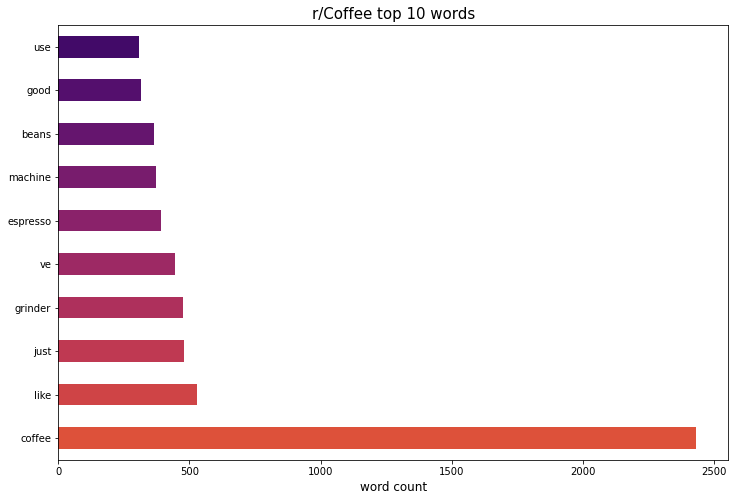

In [50]:
# plot unigram
top_words(coffee_vis,1,'r/Coffee top 10 words')

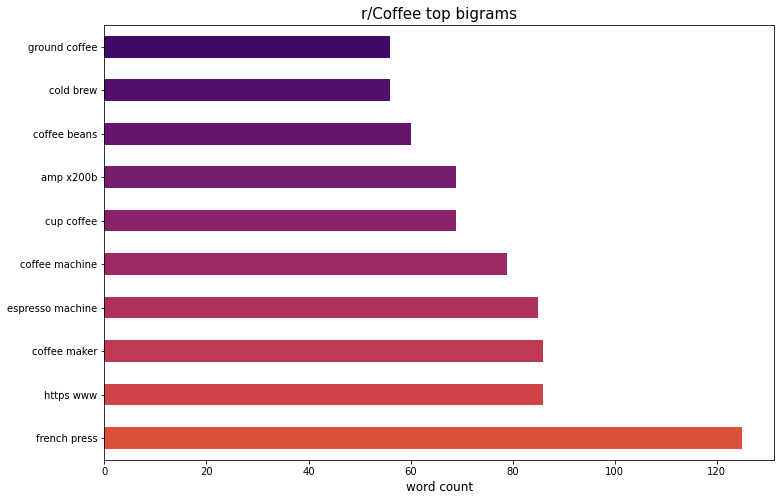

In [51]:
# plot bigram
top_words(coffee_vis,2,'r/Coffee top bigrams')

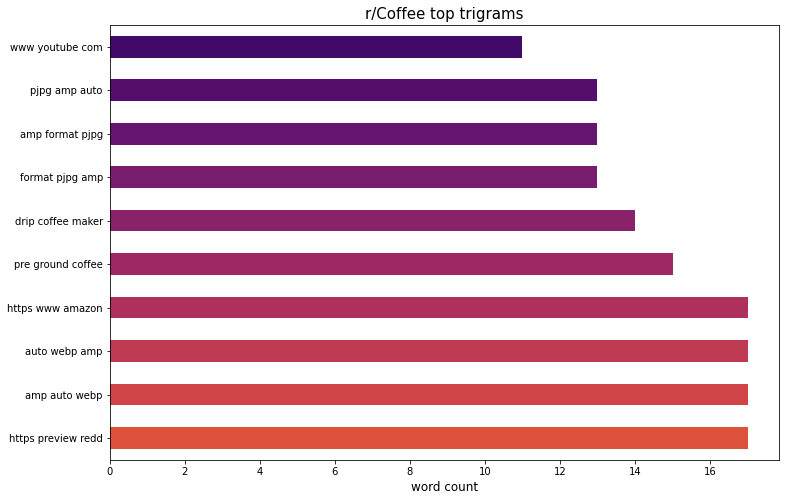

In [52]:
# plot trigram
top_words(coffee_vis,3,'r/Coffee top trigrams')

### Tea n-grams

In [53]:
# separate dataframe just for exploratory visualizations
# combined title and selftext columns
tea_vis = df_vis(tea_cleaned)

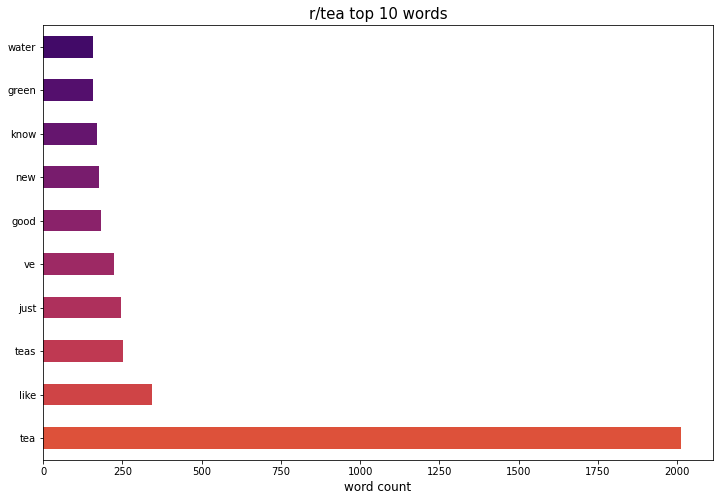

In [54]:
# plot unigram
top_words(tea_vis,1,'r/tea top 10 words')

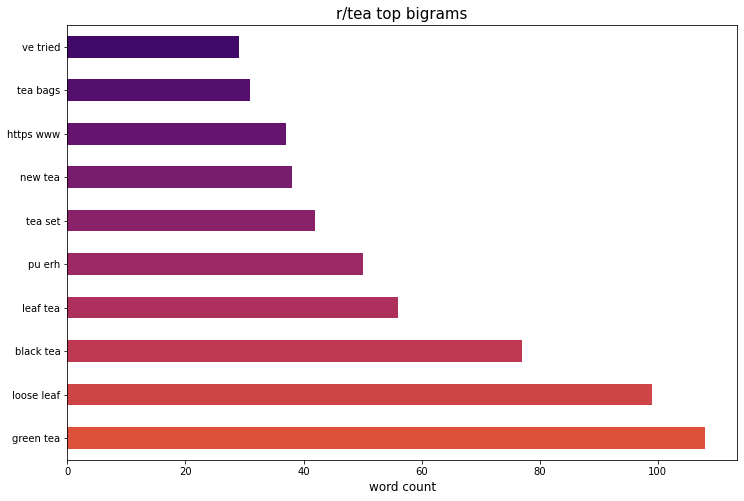

In [55]:
# plot bigram
top_words(tea_vis,2,'r/tea top bigrams')

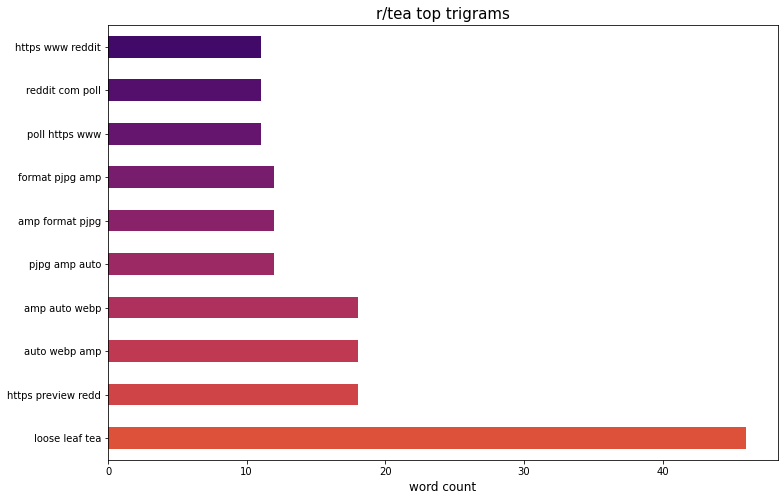

In [56]:
# plot trigram
top_words(tea_vis,3,'r/tea top trigrams')

### Venn Diagram

Venn Diagram below shows the top 50 words for both subreddits.
There are 7 common words showing both subreddits to be different yet having certain similarities.


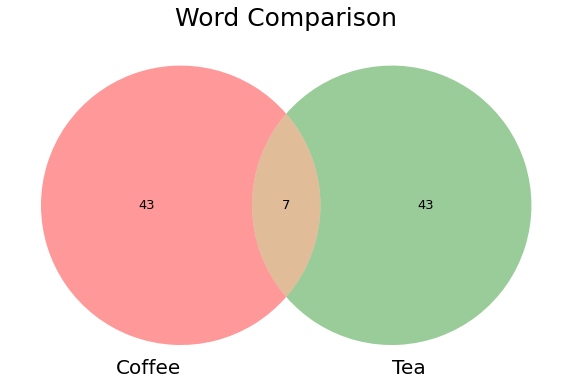

In [57]:
# plot venn diagram to find overlapping words between coffee and tea subreddits
plot_venn(coffee_cleaned, tea_cleaned)

## Combine dataframes & feature engineer
---

In [58]:
# concat dataframes: coffee_cleaned and tea_cleaned
combined_df = pd.concat([coffee_cleaned, tea_cleaned], ignore_index = True, axis = 0)

In [59]:
# sanity checks
display(combined_df.head(2))
display(combined_df.tail(2))
print(combined_df.shape)

,subreddit,words
0,Coffee,Scaling 4:6 v60 method. Do I Also Scale Pour T...
1,Coffee,"Search: Beans With Clear Stone Fruit Note, Pre..."


,subreddit,words
2806,tea,Sweet summery strawberry for Boxing Day
2807,tea,Has anyone tried Vietnamese clay pots?


(2808, 2)


In [60]:
# binarize coffee and tea into 0 and 1
combined_df['subreddit'] = combined_df['subreddit'].map({'Coffee':0, 'tea':1})

In [61]:
# sanity checks
display(combined_df.head(2))
display(combined_df.tail(2))

,subreddit,words
0,0,Scaling 4:6 v60 method. Do I Also Scale Pour T...
1,0,"Search: Beans With Clear Stone Fruit Note, Pre..."


,subreddit,words
2806,1,Sweet summery strawberry for Boxing Day
2807,1,Has anyone tried Vietnamese clay pots?


In [62]:
# replace the hyperlinks as blank space
combined_df = combined_df.replace(to_replace = r'http[^ ]+', value = '', regex=True)

# replace the HTML special entities (e.g. &amp) as blank space
combined_df = combined_df.replace(to_replace = r'\&\w+', value = '', regex=True)
combined_df = combined_df.replace(to_replace = r'x200b$', value = '', regex=True)

### Run visualizations for combined_df

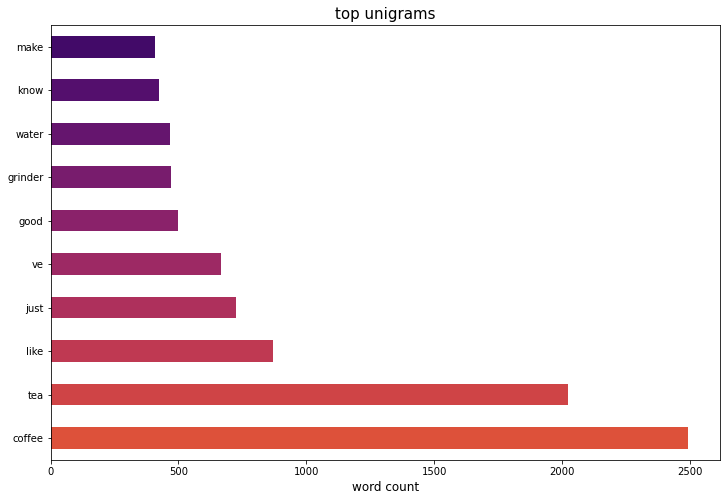

In [63]:
# plot unigram
top_words(combined_df,1,'top unigrams')

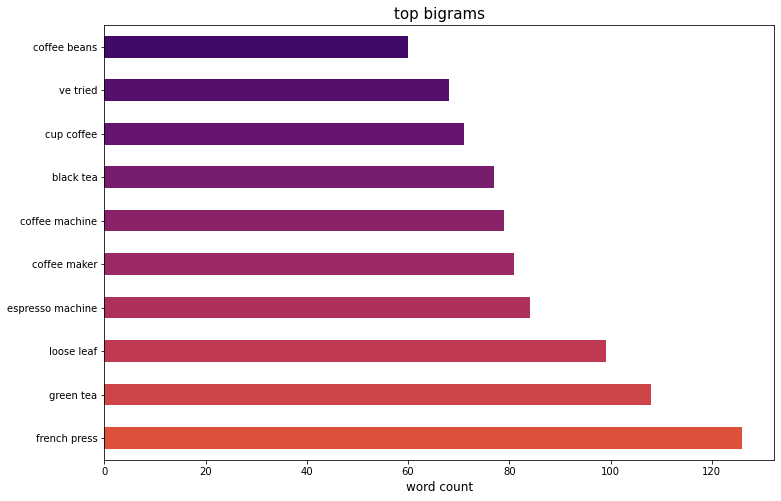

In [64]:
# plot bigram
top_words(combined_df,2,'top bigrams')

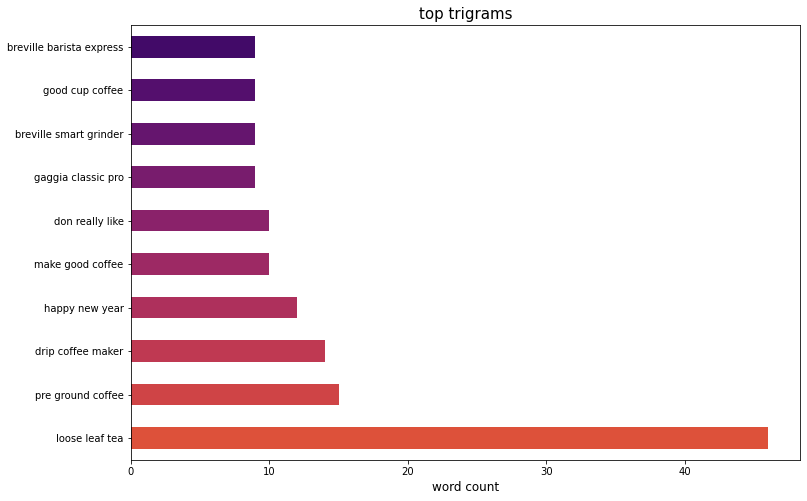

In [65]:
# plot trigram
top_words(combined_df,3,'top trigrams')

## Export
---

In [66]:
combined_df.to_csv(f"../datasets/combined.csv", index = False)